In [10]:
import numpy as np
import pandas as pd
import utils
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/data-final.csv',sep='\t')
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [4]:
data2 = data.iloc[: , :50]
data2['country'] = data['country']
data2.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 51 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3     1013558 non-null  float64
 3   EXT4     1013558 non-null  float64
 4   EXT5     1013558 non-null  float64
 5   EXT6     1013558 non-null  float64
 6   EXT7     1013558 non-null  float64
 7   EXT8     1013558 non-null  float64
 8   EXT9     1013558 non-null  float64
 9   EXT10    1013558 non-null  float64
 10  EST1     1013558 non-null  float64
 11  EST2     1013558 non-null  float64
 12  EST3     1013558 non-null  float64
 13  EST4     1013558 non-null  float64
 14  EST5     1013558 non-null  float64
 15  EST6     1013558 non-null  float64
 16  EST7     1013558 non-null  float64
 17  EST8     1013558 non-null  float64
 18  EST9     1013558 non-null  float64
 19  EST10    1013558 non-null  float64
 20  AG

In [8]:
data2=data2.dropna()
data2=data2.drop_duplicates()
data2

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


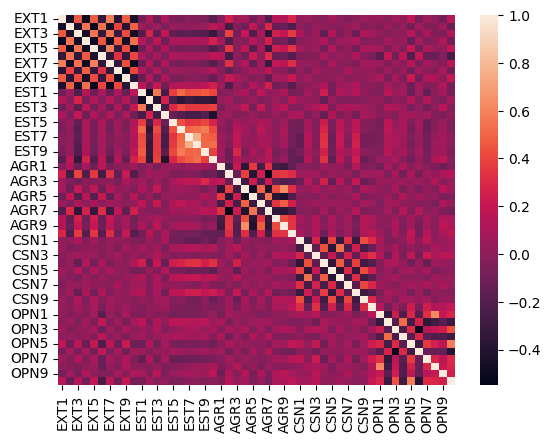

In [11]:
sn.heatmap(data2.corr())
plt.show()

In [12]:
from sklearn_som.som import SOM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from joblib import dump, load

In [17]:
X = data2.drop(['country'], axis=1).copy()
Y = data2['country'].copy()
print(X)
print(Y)

         EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0  ...   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0  ...   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0  ...   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0  ...   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0  ...   

         OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  OPN9  OPN10  
0   

In [20]:
pd.Series(Y).value_counts()

US    543974
GB     66292
CA     61624
AU     49619
PH     19483
       ...  
TD         1
KM         1
FK         1
MH         1
SH         1
Name: country, Length: 223, dtype: int64

In [26]:
print(pd.Series(Y).unique())
print(len(pd.Series(Y).unique()))

['GB' 'MY' 'KE' 'SE' 'US' 'FI' 'UA' 'PH' 'FR' 'AU' 'IN' 'CA' 'NL' 'ZA'
 'HK' 'BR' 'CH' 'TH' 'IT' 'ES' 'AE' 'HR' 'GR' 'IE' 'OM' 'DE' 'PT' 'SG'
 'NONE' 'RO' 'NO' 'BD' 'BN' 'NG' 'LT' 'ET' 'ID' 'BE' 'AT' 'DK' 'TZ' 'LU'
 'PL' 'JP' 'MX' 'CY' 'UG' 'LK' 'TR' 'MM' 'CO' 'EE' 'AR' 'IS' 'HU' 'PR'
 'PK' 'TN' 'LV' 'CZ' 'NZ' 'RS' 'IL' 'JM' 'CL' 'QA' 'SA' 'VN' 'KZ' 'BA'
 'MU' 'EG' 'PE' 'SI' 'JO' 'TW' 'DO' 'DZ' 'KW' 'MA' 'MT' 'TT' 'BS' 'VE'
 'RU' 'KR' 'LR' 'GT' 'BG' 'IM' 'GH' 'SO' 'SK' 'MV' 'CN' 'AZ' 'AL' 'KH'
 'LB' 'UY' 'ZW' 'UZ' 'HN' 'CR' 'GE' 'GI' 'MO' 'NP' 'IR' 'MK' 'MN' 'ZM'
 'NI' 'BH' 'SD' 'BZ' 'GD' 'KY' 'BB' 'CI' 'PG' 'AG' 'VI' 'PY' 'PA' 'SZ'
 'SV' 'ME' 'BM' 'AO' 'KG' 'FJ' 'VC' 'AF' 'RW' 'GG' 'BY' 'GP' 'AX' 'LY'
 'JE' 'MP' 'SY' 'PS' 'GA' 'MD' 'GU' 'AM' 'EC' 'VG' 'YE' 'CW' 'PF' 'DM'
 'BW' 'BI' 'AW' 'CM' 'LC' 'GY' 'CV' 'LS' 'GM' 'IQ' 'BO' 'LA' 'XK' 'SR'
 'SS' 'CU' 'NC' 'MZ' 'SN' 'SC' 'FO' 'MW' 'PW' 'MG' 'NU' 'AI' 'KN' 'VU'
 'MC' 'CK' 'MQ' 'BJ' 'BT' 'AQ' 'GL' 'MS' 'HT' 'FK' 'CD' 'MH' 'TC' 'RE'
 'ML

In [18]:
le = LabelEncoder()
Y_le = le.fit_transform(Y)
le_dict = dict(zip(le.classes_,le.transform(le.classes_)))
print(le_dict)

{'AD': 0, 'AE': 1, 'AF': 2, 'AG': 3, 'AI': 4, 'AL': 5, 'AM': 6, 'AO': 7, 'AQ': 8, 'AR': 9, 'AS': 10, 'AT': 11, 'AU': 12, 'AW': 13, 'AX': 14, 'AZ': 15, 'BA': 16, 'BB': 17, 'BD': 18, 'BE': 19, 'BF': 20, 'BG': 21, 'BH': 22, 'BI': 23, 'BJ': 24, 'BM': 25, 'BN': 26, 'BO': 27, 'BQ': 28, 'BR': 29, 'BS': 30, 'BT': 31, 'BW': 32, 'BY': 33, 'BZ': 34, 'CA': 35, 'CD': 36, 'CG': 37, 'CH': 38, 'CI': 39, 'CK': 40, 'CL': 41, 'CM': 42, 'CN': 43, 'CO': 44, 'CR': 45, 'CU': 46, 'CV': 47, 'CW': 48, 'CY': 49, 'CZ': 50, 'DE': 51, 'DJ': 52, 'DK': 53, 'DM': 54, 'DO': 55, 'DZ': 56, 'EC': 57, 'EE': 58, 'EG': 59, 'ES': 60, 'ET': 61, 'FI': 62, 'FJ': 63, 'FK': 64, 'FM': 65, 'FO': 66, 'FR': 67, 'GA': 68, 'GB': 69, 'GD': 70, 'GE': 71, 'GF': 72, 'GG': 73, 'GH': 74, 'GI': 75, 'GL': 76, 'GM': 77, 'GN': 78, 'GP': 79, 'GQ': 80, 'GR': 81, 'GT': 82, 'GU': 83, 'GY': 84, 'HK': 85, 'HN': 86, 'HR': 87, 'HT': 88, 'HU': 89, 'ID': 90, 'IE': 91, 'IL': 92, 'IM': 93, 'IN': 94, 'IQ': 95, 'IR': 96, 'IS': 97, 'IT': 98, 'JE': 99, 'JM': 100

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_le, test_size=0.2, random_state=0)

In [29]:
print(pd.Series(y_train).value_counts())

208    435282
69      53198
35      49280
12      39759
161     15584
        ...  
78          1
106         1
129         1
147         1
23          1
Length: 222, dtype: int64


In [30]:
# som = load('reddit_data/som1.joblib')
som = SOM(m=14, n=16, dim=50, max_iter=10000)
som.fit(x_train.to_numpy())
predictions = som.predict(x_test.to_numpy())

In [31]:
for i in range(len(predictions)):
    print(predictions[i], y_test[i])

202 208
221 215
222 208
200 208
181 208
68 208
173 208
22 197
8 208
18 208
193 69
138 208
209 208
30 151
148 35
135 44
141 94
213 151
53 91
22 153
139 208
160 35
141 180
59 208
85 69
89 208
121 208
209 60
148 12
151 208
223 69
123 208
131 208
213 208
12 208
192 208
93 208
155 12
203 208
59 208
152 208
132 69
76 91
76 208
170 161
112 151
3 208
8 208
76 35
199 69
131 208
0 71
180 208
219 208
192 208
129 208
66 151
212 208
213 19
211 35
64 179
195 202
141 162
141 165
149 208
108 69
8 180
57 208
165 35
54 208
41 208
63 150
165 152
112 150
182 69
217 150
193 12
85 208
2 155
26 105
141 208
7 143
166 208
47 94
74 208
94 161
74 29
58 208
140 208
56 35
59 161
161 208
22 43
171 197
24 208
165 208
223 208
126 9
185 208
71 208
144 208
64 98
211 208
207 69
38 208
21 208
157 208
183 208
135 208
42 69
144 12
70 35
27 179
214 94
149 179
194 208
148 208
63 208
165 208
103 208
40 208
141 94
34 208
19 144
148 208
92 208
11 165
205 208
161 208
150 35
221 51
23 35
21 69
22 208
149 208
94 12
192 152
206 92


50 208
34 208
78 208
9 208
223 69
7 162
114 208
211 208
57 35
164 172
207 208
96 208
25 208
175 208
89 155
183 208
180 208
119 152
117 144
125 12
159 208
104 208
84 208
43 209
73 113
18 208
83 155
187 151
159 208
54 208
207 12
72 208
127 208
145 94
165 143
200 208
165 208
111 208
110 208
180 208
124 180
125 208
68 208
79 35
213 208
28 208
203 161
145 12
94 35
142 94
190 208
84 82
182 208
187 208
92 208
181 208
193 179
170 87
58 143
217 208
133 202
125 12
68 161
172 208
136 208
13 162
195 12
144 208
176 208
184 150
120 69
184 208
37 208
40 208
93 35
74 167
7 208
8 208
117 208
47 155
34 208
142 161
68 183
181 35
106 208
185 208
160 208
180 69
202 208
61 174
181 208
54 208
153 208
149 208
223 208
191 71
142 158
7 57
42 208
223 94
220 38
192 152
33 208
177 208
23 208
83 208
14 208
87 12
124 208
132 208
160 208
223 35
166 208
180 208
24 208
222 173
145 69
80 143
150 208
28 208
73 35
201 208
193 208
18 208
103 35
223 208
174 208
160 50
128 208
190 208
185 208
131 208
165 208
181 208
158 208


97 69
209 12
112 208
116 208
102 35
117 208
92 208
45 208
98 208
57 167
211 208
93 94
59 67
131 208
141 208
170 208
84 69
69 208
172 53
40 208
107 208
31 208
137 12
73 208
88 12
79 208
73 208
209 208
53 208
221 155
62 208
221 35
209 208
41 98
191 208
126 67
161 208
67 208
182 35
119 208
92 208
89 208
141 208
109 208
106 69
158 44
33 151
41 69
65 60
74 208
144 208
115 35
63 12
44 98
126 208
90 208
60 208
219 55
45 91
199 173
38 35
155 208
157 69
98 155
52 208
135 69
144 69
191 35
180 208
135 69
42 69
107 208
136 208
134 208
175 208
211 51
173 91
101 12
167 12
140 35
102 208
166 38
163 69
200 208
84 208
62 163
119 208
4 161
223 208
142 180
112 155
154 208
122 208
170 208
47 62
181 69
2 94
149 208
135 208
42 69
195 172
136 208
13 35
210 12
219 12
115 208
219 69
175 208
189 69
117 208
180 208
181 69
40 208
147 208
167 208
34 51
215 151
212 35
164 208
179 180
14 155
54 208
61 208
9 94
118 94
171 101
159 208
120 173
204 208
71 208
213 155
8 35
10 35
55 12
141 208
107 208
150 94
153 69
216 20

182 208
18 35
136 208
128 69
109 208
101 208
23 94
122 144
120 208
136 161
179 41
133 208
13 208
112 69
102 208
30 202
26 208
165 208
18 208
11 208
115 155
15 208
141 62
81 69
173 208
105 208
103 208
72 208
99 51
180 208
125 208
147 208
82 35
3 162
181 98
26 208
43 208
221 208
223 208
12 90
138 208
23 208
60 208
170 144
18 208
201 94
35 208
131 212
127 35
214 90
190 208
110 208
119 59
164 208
111 144
204 208
173 143
77 208
137 208
42 208
193 208
44 208
214 208
203 150
152 12
39 143
126 208
200 69
126 208
81 208
27 208
114 208
208 208
4 161
14 35
178 208
69 208
188 12
14 208
129 67
8 59
45 69
218 35
161 60
119 208
63 208
181 208
131 208
70 208
128 172
59 208
160 67
31 12
21 208
36 12
192 12
175 208
217 208
112 208
196 208
152 208
153 179
220 208
200 69
82 208
38 208
191 208
221 208
7 134
141 208
149 208
144 208
220 208
68 208
85 208
47 69
10 144
76 208
18 11
82 208
126 161
96 29
76 12
51 35
120 12
204 208
50 208
206 208
192 208
218 208
184 208
221 208
78 163
29 35
14 208
27 208
214 50
1

113 208
172 152
47 174
85 162
109 208
41 208
70 35
68 208
187 12
181 143
113 208
200 51
57 94
170 35
14 208
171 208
32 51
144 208
174 208
89 69
166 69
124 202
79 69
178 208
58 180
84 35
114 67
97 12
184 98
27 161
208 12
156 208
118 208
144 12
201 35
75 208
117 94
24 149
67 62
73 208
62 69
69 208
175 208
7 12
91 21
202 35
90 208
124 208
57 208
42 12
167 208
196 208
39 208
72 208
212 155
60 208
197 208
66 208
108 208
20 208
170 208
200 208
20 44
72 35
197 69
99 208
219 94
142 35
64 208
195 208
136 208
181 162
174 208
220 208
184 12
138 208
181 120
81 69
85 208
73 51
163 208
211 97
26 144
150 35
204 208
45 62
223 208
63 208
133 69
122 208
37 94
72 69
104 69
22 22
104 208
25 208
145 97
37 12
28 90
52 35
57 12
14 152
63 155
8 208
5 35
76 50
212 208
119 208
212 155
172 208
146 208
204 208
39 208
8 155
180 208
104 208
114 69
151 69
12 208
78 202
202 173
117 208
64 208
35 208
41 69
120 208
207 208
217 208
130 208
133 208
85 35
118 50
151 69
80 35
190 208
165 67
153 208
13 35
146 208
85 208
197

In [32]:
pd.Series(predictions).value_counts()

219    1770
165    1765
218    1600
220    1511
7      1407
       ... 
50      333
0       329
48      152
32      148
16       30
Length: 224, dtype: int64

In [33]:
pd.Series(y_test).value_counts()

208    108692
69      13094
35      12344
12       9860
161      3899
        ...  
218         1
131         1
37          1
4           1
117         1
Length: 199, dtype: int64

In [35]:
for i in range(223):
    print(i)
    print(pd.Series(predictions)[list(pd.Series(y_test).loc[lambda x : x == i].index)].value_counts())
    print('\n')

0
162    1
221    1
156    1
158    1
dtype: int64


1
3      14
21     13
4      11
7      10
218    10
       ..
145     1
82      1
184     1
96      1
190     1
Length: 198, dtype: int64


2
95     2
4      1
186    1
220    1
20     1
172    1
22     1
59     1
170    1
187    1
90     1
189    1
117    1
142    1
dtype: int64


3
2      1
92     1
105    1
98     1
dtype: int64


4
157    1
dtype: int64


5
43     3
34     2
81     2
126    2
29     2
      ..
127    1
66     1
54     1
215    1
67     1
Length: 63, dtype: int64


6
76     2
216    1
71     1
203    1
89     1
118    1
72     1
221    1
45     1
220    1
78     1
196    1
199    1
150    1
96     1
212    1
48     1
218    1
223    1
87     1
95     1
dtype: int64


7
164    1
43     1
174    1
82     1
dtype: int64


8
111    1
dtype: int64


9
41     10
147    10
77      9
7       9
60      9
       ..
91      1
89      1
154     1
67      1
142     1
Length: 191, dtype: int64


10
23     1
111    1
dtype: int6

11     2
58     1
151    1
7      1
76     1
141    1
201    1
198    1
96     1
8      1
130    1
61     1
74     1
97     1
101    1
90     1
93     1
121    1
103    1
65     1
202    1
23     1
146    1
142    1
135    1
15     1
149    1
80     1
14     1
30     1
dtype: int64


126
45     1
15     1
220    1
170    1
163    1
154    1
75     1
117    1
52     1
102    1
8      1
71     1
156    1
27     1
158    1
78     1
29     1
157    1
87     1
149    1
136    1
104    1
61     1
63     1
203    1
146    1
121    1
120    1
83     1
202    1
dtype: int64


127
Series([], dtype: int64)


128
56     1
197    1
80     1
dtype: int64


129
Series([], dtype: int64)


130
63     2
3      2
129    2
111    2
201    2
43     2
69     2
216    2
112    2
220    2
96     2
72     2
163    2
62     1
65     1
131    1
166    1
10     1
94     1
157    1
195    1
213    1
0      1
186    1
148    1
70     1
146    1
211    1
206    1
145    1
85     1
123    1
176    1
196    1
210    1